In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
import os
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
from google.colab import files

# Upload the Excel file
uploaded = files.upload()

Saving merged_stocks.xlsx to merged_stocks.xlsx


In [5]:
import pandas as pd
pdf = pd.read_excel('/content/merged_stocks.xlsx')
pdf

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,...,Longbusinesssummary,Weight,Date,Symbol_1,Adj Close,Close,High,Low,Open,Volume
0,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,415.605,3088905142272,1.251820e+11,0.170,...,Microsoft Corporation develops and supports so...,0.062784,2010-01-04,MSFT,23.389400,30.950001,31.100000,30.590000,30.620001,38409100.0
1,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,415.605,3088905142272,1.251820e+11,0.170,...,Microsoft Corporation develops and supports so...,0.062784,2010-01-05,MSFT,23.396954,30.959999,31.100000,30.639999,30.850000,49749600.0
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,415.605,3088905142272,1.251820e+11,0.170,...,Microsoft Corporation develops and supports so...,0.062784,2010-01-06,MSFT,23.253370,30.770000,31.080000,30.520000,30.879999,58182400.0
3,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,415.605,3088905142272,1.251820e+11,0.170,...,Microsoft Corporation develops and supports so...,0.062784,2010-01-07,MSFT,23.011545,30.450001,30.700001,30.190001,30.629999,50559700.0
4,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,415.605,3088905142272,1.251820e+11,0.170,...,Microsoft Corporation develops and supports so...,0.062784,2010-01-08,MSFT,23.170242,30.660000,30.879999,30.240000,30.280001,51197400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012031,NYQ,ZTS,Zoetis Inc.,Zoetis Inc.,Healthcare,Drug Manufacturers - Specialty & Generic,169.560,77369376768,3.567000e+09,0.095,...,"Zoetis Inc. engages in the discovery, developm...",0.001573,2013-12-24,ZTS,29.981770,32.369999,32.480000,32.070000,32.299999,624300.0
1012032,NYQ,ZTS,Zoetis Inc.,Zoetis Inc.,Healthcare,Drug Manufacturers - Specialty & Generic,169.560,77369376768,3.567000e+09,0.095,...,"Zoetis Inc. engages in the discovery, developm...",0.001573,2013-12-26,ZTS,30.185530,32.590000,32.779999,32.400002,32.500000,1504700.0
1012033,NYQ,ZTS,Zoetis Inc.,Zoetis Inc.,Healthcare,Drug Manufacturers - Specialty & Generic,169.560,77369376768,3.567000e+09,0.095,...,"Zoetis Inc. engages in the discovery, developm...",0.001573,2013-12-27,ZTS,30.259632,32.669998,32.770000,32.470001,32.689999,1322400.0
1012034,NYQ,ZTS,Zoetis Inc.,Zoetis Inc.,Healthcare,Drug Manufacturers - Specialty & Generic,169.560,77369376768,3.567000e+09,0.095,...,"Zoetis Inc. engages in the discovery, developm...",0.001573,2013-12-30,ZTS,30.259632,32.669998,32.840000,32.540001,32.740002,1803600.0


In [7]:
sectorDf = pdf.copy()
sectorDf.drop(['Shortname','Longname','Industry','Country','Longbusinesssummary',],axis=1,inplace=True)
sectorDf.head()

,Exchange,Symbol,Sector,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Fulltimeemployees,Weight,Date,Symbol_1,Adj Close,Close,High,Low,Open,Volume
0,NMS,MSFT,Technology,415.605,3088905142272,1.251820e+11,0.17,Redmond,WA,221000.0,0.062784,2010-01-04,MSFT,23.389400,30.950001,31.100000,30.590000,30.620001,38409100.0
1,NMS,MSFT,Technology,415.605,3088905142272,1.251820e+11,0.17,Redmond,WA,221000.0,0.062784,2010-01-05,MSFT,23.396954,30.959999,31.100000,30.639999,30.850000,49749600.0
2,NMS,MSFT,Technology,415.605,3088905142272,1.251820e+11,0.17,Redmond,WA,221000.0,0.062784,2010-01-06,MSFT,23.253370,30.770000,31.080000,30.520000,30.879999,58182400.0
3,NMS,MSFT,Technology,415.605,3088905142272,1.251820e+11,0.17,Redmond,WA,221000.0,0.062784,2010-01-07,MSFT,23.011545,30.450001,30.700001,30.190001,30.629999,50559700.0
4,NMS,MSFT,Technology,415.605,3088905142272,1.251820e+11,0.17,Redmond,WA,221000.0,0.062784,2010-01-08,MSFT,23.170242,30.660000,30.879999,30.240000,30.280001,51197400.0


In [8]:
sectorDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012036 entries, 0 to 1012035
Data columns (total 19 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   Exchange           1012036 non-null  object        
 1   Symbol             1012036 non-null  object        
 2   Sector             1012036 non-null  object        
 3   Currentprice       1012036 non-null  float64       
 4   Marketcap          1012036 non-null  int64         
 5   Ebitda             953688 non-null   float64       
 6   Revenuegrowth      1010024 non-null  float64       
 7   City               1012036 non-null  object        
 8   State              973808 non-null   object        
 9   Fulltimeemployees  1006000 non-null  float64       
 10  Weight             1012036 non-null  float64       
 11  Date               1012036 non-null  datetime64[ns]
 12  Symbol_1           1012036 non-null  object        
 13  Adj Close          907764 n

In [9]:
grouped_df = sectorDf.groupby(['Sector'])
revenue_avg = grouped_df['Revenuegrowth'].mean()
current_price = grouped_df['Currentprice'].mean()
print(revenue_avg)
print(current_price)

Sector
Basic Materials          -0.056136
Communication Services    0.031318
Consumer Cyclical         0.060614
Consumer Defensive        0.020622
Energy                    0.003045
Financial Services        0.111227
Healthcare                0.035169
Industrials               0.045425
Real Estate               0.090065
Technology                0.093547
Utilities                -0.063031
Name: Revenuegrowth, dtype: float64
Sector
Basic Materials           160.632273
Communication Services    127.485682
Consumer Cyclical         456.760965
Consumer Defensive        109.186081
Energy                     89.400227
Financial Services        168.747500
Healthcare                237.450846
Industrials               222.610616
Real Estate               123.316613
Technology                270.417500
Utilities                  78.282188
Name: Currentprice, dtype: float64


In [10]:
sector_list = sectorDf['Sector'].unique().tolist()
print(sector_list)

['Technology', 'Communication Services', 'Consumer Cyclical', 'Financial Services', 'Healthcare', 'Consumer Defensive', 'Energy', 'Basic Materials', 'Industrials', 'Utilities', 'Real Estate']


In [11]:
techDf = sectorDf[sectorDf['Sector'] == 'Technology']
techDf= techDf.dropna(subset=['Open', 'Close'])
tech_symbols = techDf['Symbol'].unique().tolist()
print(tech_symbols)

['MSFT', 'AAPL', 'NVDA', 'AVGO', 'ORCL', 'AMD', 'QCOM', 'CRM', 'ADBE', 'CSCO', 'AMAT', 'TXN', 'ACN', 'INTU', 'IBM', 'MU', 'NOW', 'INTC', 'LRCX', 'ADI', 'KLAC', 'PANW', 'FI', 'SNPS', 'APH', 'CDNS', 'NXPI', 'MSI', 'ROP', 'MCHP', 'SMCI', 'TEL', 'FTNT', 'ADSK', 'FIS', 'MPWR', 'HPQ', 'CTSH', 'IT', 'GLW', 'FICO', 'GRMN', 'ON', 'CDW', 'FSLR', 'ANSS', 'NTAP', 'WDC', 'BR', 'TER', 'PTC', 'TYL', 'LDOS', 'STX', 'TDY', 'CPAY', 'ENPH', 'VRSN', 'ZBRA', 'GEN', 'SWKS', 'JBL', 'AKAM', 'TRMB', 'JKHY', 'JNPR', 'EPAM', 'FFIV']


In [13]:
# Dictionary to store the differences
symbol_differences = {}

# Calculate the difference for each unique symbol
unique_symbols = techDf['Symbol'].unique()
for symbol in unique_symbols:
    symbol_df = techDf[techDf['Symbol'] == symbol]
    if len(symbol_df) > 0:
        first_index = int(len(symbol_df)/2)
        first = symbol_df.iloc[first_index]['Open']
        last_index = int(len(symbol_df)-1)
        symbol_last = symbol_df.iloc[last_index]['Close']
        symbol_differences[symbol] = symbol_last - first

# Add the difference column to the DataFrame
techDf['Difference'] = techDf['Symbol'].map(symbol_differences)

techDf.head()

,Exchange,Symbol,Sector,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Fulltimeemployees,Weight,Date,Symbol_1,Adj Close,Close,High,Low,Open,Volume,Difference
0,NMS,MSFT,Technology,415.605,3088905142272,1.251820e+11,0.17,Redmond,WA,221000.0,0.062784,2010-01-04,MSFT,23.389400,30.950001,31.100000,30.590000,30.620001,38409100.0,6.789999
1,NMS,MSFT,Technology,415.605,3088905142272,1.251820e+11,0.17,Redmond,WA,221000.0,0.062784,2010-01-05,MSFT,23.396954,30.959999,31.100000,30.639999,30.850000,49749600.0,6.789999
2,NMS,MSFT,Technology,415.605,3088905142272,1.251820e+11,0.17,Redmond,WA,221000.0,0.062784,2010-01-06,MSFT,23.253370,30.770000,31.080000,30.520000,30.879999,58182400.0,6.789999
3,NMS,MSFT,Technology,415.605,3088905142272,1.251820e+11,0.17,Redmond,WA,221000.0,0.062784,2010-01-07,MSFT,23.011545,30.450001,30.700001,30.190001,30.629999,50559700.0,6.789999
4,NMS,MSFT,Technology,415.605,3088905142272,1.251820e+11,0.17,Redmond,WA,221000.0,0.062784,2010-01-08,MSFT,23.170242,30.660000,30.879999,30.240000,30.280001,51197400.0,6.789999


In [14]:
tech_diff_avg = techDf['Difference'].unique().mean()
diff_list = techDf['Difference'].unique().tolist()
print(tech_diff_avg)
#for i in diff_list:
  #print(tech_diff_avg-i)



20.522031852427652


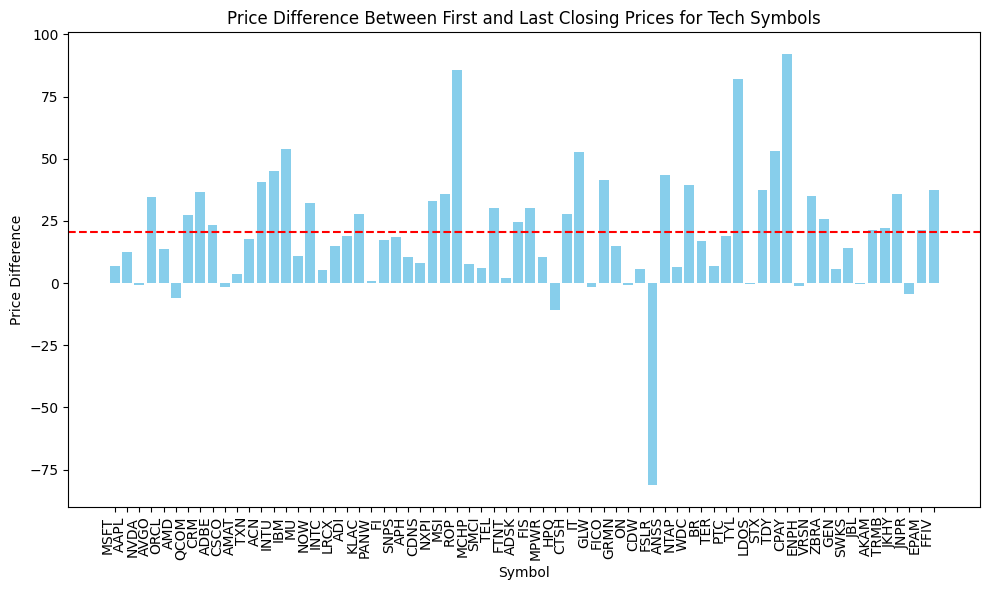

In [15]:
import matplotlib.pyplot as plt

# Lists to store symbols and differences
symbols = []
differences = []

# Calculate differences for each symbol
for i in tech_symbols:
    symbol = techDf[techDf['Symbol'] == i]
    first = symbol.iloc[0]['Open']
    last = len(symbol) - 1
    symbol_last = symbol.iloc[last]['Close']
    if pd.notna(first) and pd.notna(symbol_last):
        # Calculate the difference
        sym_diff = symbol_last - first
        symbols.append(i)
        differences.append(sym_diff)
    else:
        print(f'Symbol: {i} has NaN values in the data')

# Create bar graph
plt.figure(figsize=(10, 6))
plt.bar(symbols, differences, color='skyblue')
plt.axhline(y=tech_diff_avg, color='red', linestyle='--', label='Average Difference')
plt.xlabel('Symbol')
plt.ylabel('Price Difference')
plt.title('Price Difference Between First and Last Closing Prices for Tech Symbols')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [16]:
# Dictionary to store above/below average status
growth_status = {symbol: 'Above Average' if diff > tech_diff_avg else 'Below Average'
                 for symbol, diff in symbol_differences.items()}

# Add the growth status column to the DataFrame
techDf['Growth Status'] = techDf['Symbol'].map(growth_status)
techDf.head()

,Exchange,Symbol,Sector,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Fulltimeemployees,...,Date,Symbol_1,Adj Close,Close,High,Low,Open,Volume,Difference,Growth Status
0,NMS,MSFT,Technology,415.605,3088905142272,1.251820e+11,0.17,Redmond,WA,221000.0,...,2010-01-04,MSFT,23.389400,30.950001,31.100000,30.590000,30.620001,38409100.0,6.789999,Below Average
1,NMS,MSFT,Technology,415.605,3088905142272,1.251820e+11,0.17,Redmond,WA,221000.0,...,2010-01-05,MSFT,23.396954,30.959999,31.100000,30.639999,30.850000,49749600.0,6.789999,Below Average
2,NMS,MSFT,Technology,415.605,3088905142272,1.251820e+11,0.17,Redmond,WA,221000.0,...,2010-01-06,MSFT,23.253370,30.770000,31.080000,30.520000,30.879999,58182400.0,6.789999,Below Average
3,NMS,MSFT,Technology,415.605,3088905142272,1.251820e+11,0.17,Redmond,WA,221000.0,...,2010-01-07,MSFT,23.011545,30.450001,30.700001,30.190001,30.629999,50559700.0,6.789999,Below Average
4,NMS,MSFT,Technology,415.605,3088905142272,1.251820e+11,0.17,Redmond,WA,221000.0,...,2010-01-08,MSFT,23.170242,30.660000,30.879999,30.240000,30.280001,51197400.0,6.789999,Below Average


In [17]:
company_df = techDf.copy()
# Keep only the first row for each company
company_df=company_df.sort_values(by='Symbol').drop_duplicates(subset='Symbol', keep='first')


company_df.drop(['Sector','Symbol','City','State','Exchange','Symbol_1','Date', 'Adj Close', 'Close', 'High',
       'Low', 'Open'],axis=1,inplace=True)
company_df.head()

,Currentprice,Marketcap,Ebitda,Revenuegrowth,Fulltimeemployees,Weight,Volume,Difference,Growth Status
545465,192.325,2949130747904,1.296290e+11,-0.043,150000.0,0.059943,361253200.0,12.413929,Below Average
45605,282.290,177483923456,1.127721e+10,-0.001,742000.0,0.003607,5950000.0,40.700001,Above Average
36514,444.760,199252492288,7.589000e+09,0.113,29945.0,0.004050,5265900.0,23.230000,Above Average
84127,234.490,116357922816,4.868165e+09,-0.338,26000.0,0.002365,2138400.0,19.139999,Below Average
556008,201.700,43146657792,1.219000e+09,0.115,NaN,0.000877,2780800.0,24.709999,Above Average


In [18]:
company_df.columns

Index(['Currentprice', 'Marketcap', 'Ebitda', 'Revenuegrowth',
       'Fulltimeemployees', 'Weight', 'Volume', 'Difference', 'Growth Status'],
      dtype='object')

In [19]:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68 entries, 545465 to 1010020
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Currentprice       68 non-null     float64
 1   Marketcap          68 non-null     int64  
 2   Ebitda             68 non-null     float64
 3   Revenuegrowth      67 non-null     float64
 4   Fulltimeemployees  67 non-null     float64
 5   Weight             68 non-null     float64
 6   Volume             68 non-null     float64
 7   Difference         68 non-null     float64
 8   Growth Status      68 non-null     object 
dtypes: float64(7), int64(1), object(1)
memory usage: 5.3+ KB


In [20]:
dummies = pd.get_dummies(company_df[['Growth Status']])
scaler = StandardScaler()
scaled = scaler.fit_transform(company_df.drop(['Growth Status'],axis=1))
scaled = pd.DataFrame(scaled,columns=company_df.drop(['Growth Status'],axis=1).columns)
mergedDf = pd.concat([scaled,dummies],axis=1)
#mergedDf.drop([],axis=1,inplace=True)
mergedDf.head()

,Currentprice,Marketcap,Ebitda,Revenuegrowth,Fulltimeemployees,Weight,Volume,Difference,Growth Status_Above Average,Growth Status_Below Average
0,-0.339649,4.649007,5.537229,-0.315902,0.870819,4.649007,7.850209,-0.332667,NaN,NaN
1,-0.024236,-0.048065,0.143647,-0.217611,6.378613,-0.048065,-0.167517,0.827882,NaN,NaN
2,0.545377,-0.011174,-0.024433,0.049181,-0.246138,-0.011174,-0.182954,0.111105,NaN,NaN
3,-0.191821,-0.151654,-0.148429,-1.006283,-0.282841,-0.151654,-0.253529,-0.056703,NaN,NaN
4,-0.306781,-0.275724,-0.314730,0.053861,NaN,-0.275724,-0.239033,0.171828,NaN,NaN


In [21]:
X = mergedDf.copy().astype(np.float32)
X.drop(['Growth Status_Above Average','Growth Status_Below Average'],axis=1,inplace=True)
y = mergedDf['Growth Status_Above Average'].values.astype(np.float32)
# Split the preprocessed data into a training and testing dataset
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 random_state=97)
print(X_train.shape)
print(X_test.shape)

(102, 8)
(34, 8)


In [22]:
num_features = len(X_train.iloc[0])
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=50,activation='relu', input_dim=num_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=50,activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                450       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 3051 (11.92 KB)
Trainable params: 3051 (11.92 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
# Compile the model
nn.compile(loss='binary_crossentropy',
           optimizer='adam',
           metrics=['accuracy'])

In [24]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=10)

Epoch 1/10
4/4 [==============================] - 7s 1s/step - loss: nan - accuracy: 0.2647
Epoch 2/10
4/4 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.2647
Epoch 3/10
4/4 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.2647
Epoch 4/10
4/4 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.2647
Epoch 5/10
4/4 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.2647
Epoch 6/10
4/4 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.2647
Epoch 7/10
4/4 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.2647
Epoch 8/10
4/4 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.2647
Epoch 9/10
4/4 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.2647
Epoch 10/10
4/4 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.2647


In [25]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2/2 - 0s - loss: nan - accuracy: 0.2941 - 182ms/epoch - 91ms/step
Loss: nan, Accuracy: 0.29411765933036804


In [26]:
# Export our model to HDF5 file
nn.save('SectorModel.h5')

In [27]:
from sklearn.preprocessing import LabelEncoder

# Drop rows where either 'Open' or 'Close' is NaN
techDf_cleaned = techDf.dropna(subset=['Open', 'Close'])

# Encode Growth Status as numerical values
label_encoder = LabelEncoder()
techDf_cleaned['Growth Status Encoded'] = label_encoder.fit_transform(techDf_cleaned['Growth Status'])

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(techDf_cleaned[['Open', 'Close']])

# Prepare the input features and target variable
X = scaled_features[:int(len(scaled_features)/2)-1]  # Looking at data from the first 2 Years
y = techDf_cleaned['Growth Status Encoded'][1:int(len(scaled_features)/2)]  # Shifted to predict the next status

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Reshape the input data for LSTM
X_train_reshaped = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_reshaped = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [28]:
# Define the Dense model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=5, activation='tanh', input_shape=(1, X_train.shape[1])))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, verbose=2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f'Test Accuracy: {accuracy}')

Epoch 1/10
1620/1620 - 6s - loss: 0.4950 - accuracy: 0.7514 - 6s/epoch - 4ms/step
Epoch 2/10
1620/1620 - 4s - loss: 0.4755 - accuracy: 0.7585 - 4s/epoch - 2ms/step
Epoch 3/10
1620/1620 - 4s - loss: 0.4717 - accuracy: 0.7599 - 4s/epoch - 2ms/step
Epoch 4/10
1620/1620 - 5s - loss: 0.4693 - accuracy: 0.7616 - 5s/epoch - 3ms/step
Epoch 5/10
1620/1620 - 4s - loss: 0.4677 - accuracy: 0.7622 - 4s/epoch - 2ms/step
Epoch 6/10
1620/1620 - 4s - loss: 0.4667 - accuracy: 0.7636 - 4s/epoch - 3ms/step
Epoch 7/10
1620/1620 - 5s - loss: 0.4658 - accuracy: 0.7640 - 5s/epoch - 3ms/step
Epoch 8/10
1620/1620 - 4s - loss: 0.4653 - accuracy: 0.7643 - 4s/epoch - 2ms/step
Epoch 9/10
1620/1620 - 5s - loss: 0.4648 - accuracy: 0.7646 - 5s/epoch - 3ms/step
Epoch 10/10
1620/1620 - 4s - loss: 0.4642 - accuracy: 0.7647 - 4s/epoch - 2ms/step
405/405 [==============================] - 3s 6ms/step - loss: 0.4888 - accuracy: 0.7839
Test Accuracy: 0.7838839292526245


In [88]:
# Define the LSTM model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(units=50, activation='relu', input_shape=(1, X_train.shape[1])))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, verbose=2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f'Test Accuracy: {accuracy}')

Epoch 1/10
1620/1620 - 9s - loss: 0.4871 - accuracy: 0.7596 - 9s/epoch - 6ms/step
Epoch 2/10
1620/1620 - 3s - loss: 0.4639 - accuracy: 0.7658 - 3s/epoch - 2ms/step
Epoch 3/10
1620/1620 - 3s - loss: 0.4612 - accuracy: 0.7669 - 3s/epoch - 2ms/step
Epoch 4/10
1620/1620 - 5s - loss: 0.4587 - accuracy: 0.7660 - 5s/epoch - 3ms/step
Epoch 5/10
1620/1620 - 4s - loss: 0.4570 - accuracy: 0.7657 - 4s/epoch - 3ms/step
Epoch 6/10
1620/1620 - 4s - loss: 0.4557 - accuracy: 0.7648 - 4s/epoch - 2ms/step
Epoch 7/10
1620/1620 - 4s - loss: 0.4546 - accuracy: 0.7655 - 4s/epoch - 2ms/step
Epoch 8/10
1620/1620 - 6s - loss: 0.4539 - accuracy: 0.7660 - 6s/epoch - 4ms/step
Epoch 9/10
1620/1620 - 3s - loss: 0.4534 - accuracy: 0.7647 - 3s/epoch - 2ms/step
Epoch 10/10
1620/1620 - 4s - loss: 0.4528 - accuracy: 0.7654 - 4s/epoch - 2ms/step
405/405 [==============================] - 1s 2ms/step - loss: 0.5242 - accuracy: 0.7674
Test Accuracy: 0.7673664689064026


In [72]:
# Export our model to HDF5 file
model.save('OpenCloseModel.h5')

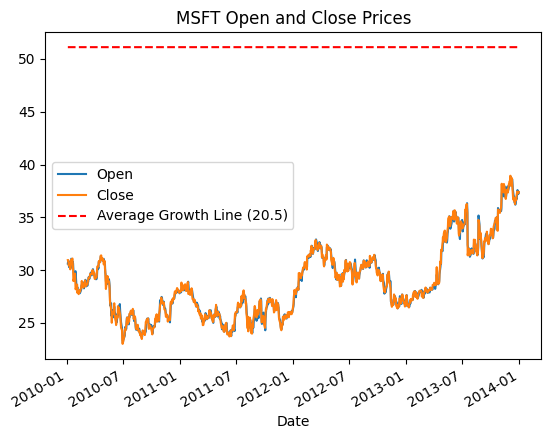

In [48]:

msft_df = techDf[techDf['Symbol'] == 'MSFT'].copy()

msft_df.plot(x='Date', y=['Open', 'Close'])
plt.title('MSFT Open and Close Prices')

# Get the initial starting point (first date and open price)
initial_open_price = msft_df['Open'].iloc[0]

# Calculate the line with a slope of 20.5
msft_df['Slope Line'] = initial_open_price + 20.5

# Plot the slope line
plt.plot(msft_df['Date'], msft_df['Slope Line'], label='Average Growth Line (20.5)', linestyle='--', color='red')
# Show the legend
plt.legend()

plt.show()


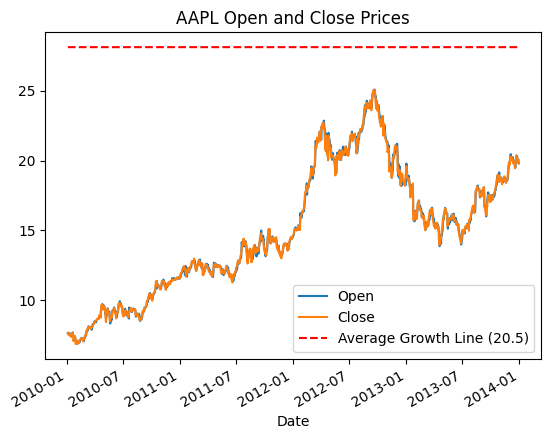

In [49]:
aapl_df = techDf[techDf['Symbol'] == 'AAPL'].copy()

aapl_df.plot(x='Date', y=['Open', 'Close'])
plt.title('AAPL Open and Close Prices')


initial_open_price = aapl_df['Open'].iloc[0]


# Calculate the line with a slope of 20.5
aapl_df['Slope Line'] = initial_open_price + 20.5

# Plot the slope line
plt.plot(aapl_df['Date'], aapl_df['Slope Line'], label='Average Growth Line (20.5)', linestyle='--', color='red')

plt.legend()

plt.show()


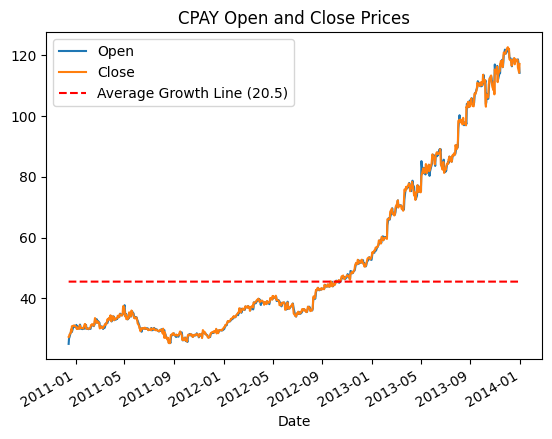

In [52]:
cpay_df = techDf[techDf['Symbol'] == 'CPAY'].copy()

cpay_df.plot(x='Date', y=['Open', 'Close'])
plt.title('CPAY Open and Close Prices')

# Get the initial starting point (first date and open price)
initial_open_price = cpay_df['Open'].iloc[0]

# Calculate the line with a slope of 20.5
cpay_df['Slope Line'] = initial_open_price + 20.5

# Plot the slope line
plt.plot(cpay_df['Date'], cpay_df['Slope Line'], label='Average Growth Line (20.5)', linestyle='--', color='red')
# Show the legend
plt.legend()

plt.show()


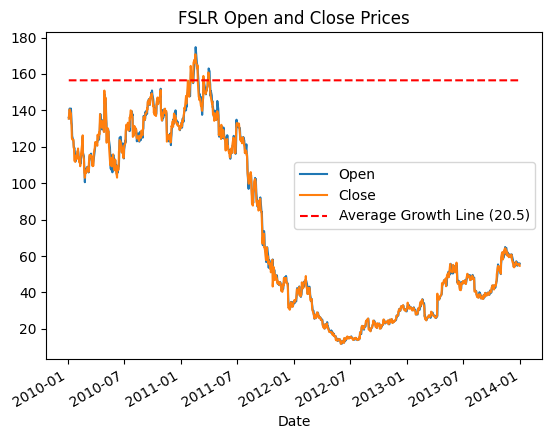

In [53]:
fslr_df = techDf[techDf['Symbol'] == 'FSLR'].copy()

fslr_df.plot(x='Date', y=['Open', 'Close'])
plt.title('FSLR Open and Close Prices')

# Get the initial starting point (first date and open price)
initial_open_price = fslr_df['Open'].iloc[0]

# Calculate the line with a slope of 20.5
fslr_df['Slope Line'] = initial_open_price + 20.5

# Plot the slope line
plt.plot(fslr_df['Date'], fslr_df['Slope Line'], label='Average Growth Line (20.5)', linestyle='--', color='red')
# Show the legend
plt.legend()

plt.show()


In [89]:
# Define the LSTM model
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.LSTM(units=5, activation='relu', input_shape=(1, X_train.shape[1])))
model2.add(tf.keras.layers.Dense(units=10, activation='relu'))
model2.add(tf.keras.layers.Dense(units=5, activation='relu'))
model2.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

# Compile the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model2.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=2)

# Evaluate the model
loss, accuracy = model2.evaluate(X_test_reshaped, y_test)
print(f'Test Accuracy: {accuracy}')

Epoch 1/50
1620/1620 - 7s - loss: 0.4870 - accuracy: 0.7591 - 7s/epoch - 4ms/step
Epoch 2/50
1620/1620 - 4s - loss: 0.4629 - accuracy: 0.7656 - 4s/epoch - 2ms/step
Epoch 3/50
1620/1620 - 4s - loss: 0.4612 - accuracy: 0.7645 - 4s/epoch - 2ms/step
Epoch 4/50
1620/1620 - 5s - loss: 0.4598 - accuracy: 0.7651 - 5s/epoch - 3ms/step
Epoch 5/50
1620/1620 - 4s - loss: 0.4572 - accuracy: 0.7648 - 4s/epoch - 2ms/step
Epoch 6/50
1620/1620 - 4s - loss: 0.4548 - accuracy: 0.7649 - 4s/epoch - 2ms/step
Epoch 7/50
1620/1620 - 5s - loss: 0.4530 - accuracy: 0.7651 - 5s/epoch - 3ms/step
Epoch 8/50
1620/1620 - 4s - loss: 0.4516 - accuracy: 0.7658 - 4s/epoch - 3ms/step
Epoch 9/50
1620/1620 - 4s - loss: 0.4505 - accuracy: 0.7649 - 4s/epoch - 2ms/step
Epoch 10/50
1620/1620 - 4s - loss: 0.4499 - accuracy: 0.7651 - 4s/epoch - 3ms/step
Epoch 11/50
1620/1620 - 6s - loss: 0.4494 - accuracy: 0.7657 - 6s/epoch - 4ms/step
Epoch 12/50
1620/1620 - 4s - loss: 0.4490 - accuracy: 0.7652 - 4s/epoch - 2ms/step
Epoch 13/50
1

In [74]:
from sklearn.metrics import mean_squared_error

# Make predictions on the test set
y_pred = model2.predict(X_test_reshaped)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Root Mean Square Error (RMSE): {rmse}')


7/7 [==============================] - 0s 14ms/step
Root Mean Square Error (RMSE): 0.4678872226182542


In [73]:
# Export our model to HDF5 file
model2.save('OpenCloseOptimized.h5')

In [67]:
techDf_cleaned = techDf.dropna(subset=['Open', 'Close'])

# Encode Growth Status as numerical values
label_encoder = LabelEncoder()
techDf_cleaned['Growth Status Encoded'] = label_encoder.fit_transform(techDf_cleaned['Growth Status'])

# Initialize lists to store results
results = []

# Loop through each symbol
for symbol in techDf_cleaned['Symbol'].unique():
    symbol_df = techDf_cleaned[techDf_cleaned['Symbol'] == symbol].copy()

    # Scale the features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(symbol_df[['Open', 'Close']])

    # Prepare the input features and target variable
    X = scaled_features[:int(len(scaled_features)/2)-1]  # Looking at data from the first 2 Years
    y = techDf_cleaned['Growth Status Encoded'][1:int(len(scaled_features)/2)]  # Shifted to predict the next status

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Reshape the input data for LSTM
    X_train_reshaped = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
    X_test_reshaped = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


    # Define the LSTM model
    model2 = tf.keras.models.Sequential()
    model2.add(tf.keras.layers.LSTM(units=5, activation='relu', input_shape=(1, X_train.shape[1])))
    model2.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

    # Compile the model
    model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model2.fit(X_train_reshaped, y_train, epochs=5, batch_size=32, verbose=2)

    # Predict the growth status for the test set
    predictions = model2.predict(X_test_reshaped)
    predictions = (predictions > 0.5).astype(int)  # Convert probabilities to binary predictions

    # Store the results in a list
    for i in range(len(predictions)):
        results.append({
            'Symbol': symbol,
            'Predicted Growth': label_encoder.inverse_transform(predictions[i])[0],

        })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)
print(results_df)


Epoch 1/5
26/26 - 2s - loss: 0.6189 - accuracy: 0.9801 - 2s/epoch - 69ms/step
Epoch 2/5
26/26 - 0s - loss: 0.5848 - accuracy: 1.0000 - 62ms/epoch - 2ms/step
Epoch 3/5
26/26 - 0s - loss: 0.5501 - accuracy: 1.0000 - 67ms/epoch - 3ms/step
Epoch 4/5
26/26 - 0s - loss: 0.5146 - accuracy: 1.0000 - 61ms/epoch - 2ms/step
Epoch 5/5
26/26 - 0s - loss: 0.4788 - accuracy: 1.0000 - 64ms/epoch - 2ms/step
7/7 [==============================] - 0s 3ms/step
Epoch 1/5
26/26 - 2s - loss: 0.6611 - accuracy: 0.6704 - 2s/epoch - 61ms/step
Epoch 2/5
26/26 - 0s - loss: 0.6352 - accuracy: 0.9167 - 62ms/epoch - 2ms/step
Epoch 3/5
26/26 - 0s - loss: 0.6090 - accuracy: 1.0000 - 68ms/epoch - 3ms/step
Epoch 4/5
26/26 - 0s - loss: 0.5819 - accuracy: 1.0000 - 69ms/epoch - 3ms/step
Epoch 5/5
26/26 - 0s - loss: 0.5532 - accuracy: 1.0000 - 79ms/epoch - 3ms/step
7/7 [==============================] - 0s 2ms/step
Epoch 1/5
26/26 - 2s - loss: 0.7548 - accuracy: 0.0933 - 2s/epoch - 62ms/step
Epoch 2/5
26/26 - 0s - loss: 0.7